In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

In [3]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmpf92lwl_xGP2
Verbose mode active!


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Brain_MRI_Segmentation/Brain_MRI_Segmentation.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Brain_MRI_Segmentation/Brain_MRI_Segmentation_masks.npy')

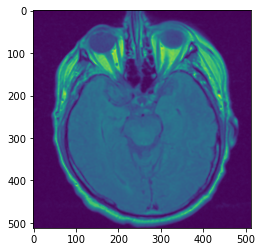

In [5]:
plt.imshow(images[1])

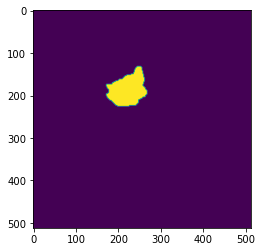

In [6]:
plt.imshow(masks[1])

In [7]:
len(images)

3929

In [8]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [9]:
#
#
R.setup_data(images, masks, dataset_size=3929, weights=weights)

Weights OK!


In [10]:
RUNS = 5

In [11]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
4/4 [==============================] - 28s 3s/step - loss: -3.7860 - dice_coeff: 1.2663 - val_loss: -1.5065 - val_dice_coeff: 1.1238
Epoch 2/100
4/4 [==============================] - 4s 1s/step - loss: -12.0321 - dice_coeff: 1.1008 - val_loss: -1.1267 - val_dice_coeff: 1.0778
Epoch 3/100
4/4 [==============================] - 4s 1s/step - loss: -19.0981 - dice_coeff: 1.5494 - val_loss: -1.2496 - val_dice_coeff: 1.0926
Epoch 4/100
4/4 [==============================] - 4s 1s/step - loss: -20.1591 - dice_coeff: 1.5028 - val_loss: -0.9842 - val_dice_coeff: 1.0592
Epoch 5/100
4/4 [==============================] - 4s 1s/step - loss: -25.3576 - dice_coeff: 1.1413 - val_loss: -0.8121 - val_dice_coeff: 1.0364
Epoch 6/100
4/4 [==============================] - 5s 1s/step - loss: -31.0904 - dice_coeff: 1.6285 - val_loss: -0.8492 - val_dice_coeff: 1.0410
Epoch 7/100
4/4 [==============================] - 4s 1s/step - loss: -27.2600 - dice_coeff: 1.4477 - val_loss: -0.6490

Epoch 1/100
4/4 [==============================] - 11s 3s/step - loss: -28.1888 - dice_coeff: 1.5505 - val_loss: -0.9060 - val_dice_coeff: 1.0494
Epoch 2/100
4/4 [==============================] - 5s 1s/step - loss: -33.4509 - dice_coeff: 1.6075 - val_loss: -0.9051 - val_dice_coeff: 1.0498
Epoch 3/100
4/4 [==============================] - 5s 1s/step - loss: -36.8682 - dice_coeff: 1.6727 - val_loss: -0.8211 - val_dice_coeff: 1.0382
Epoch 4/100
4/4 [==============================] - 5s 1s/step - loss: -28.5511 - dice_coeff: 1.5928 - val_loss: -1.3280 - val_dice_coeff: 1.1059
Epoch 5/100
4/4 [==============================] - 5s 1s/step - loss: -35.7740 - dice_coeff: 1.6581 - val_loss: -0.9859 - val_dice_coeff: 1.0621
Model saved to /tmp/tmpf92lwl_xGP2/unet_1.model
History saved to /tmp/tmpf92lwl_xGP2/history_1.pickle
Testing the classifier...
37/37 [==============================] - 4s 105ms/step - loss: -1.7433 - dice_coeff: 1.0041
Testing the discriminator...
8/8 [====================

Testing the classifier...
37/37 [==============================] - 4s 106ms/step - loss: -3.8099 - dice_coeff: 1.2078
Testing the discriminator...
8/8 [==============================] - 0s 36ms/step - loss: 45.7690 - accuracy: 0.5362
Found 14 machine labels.
Machine labels [ 25  28  36  50  51  60  66  84 124 132 193 221 228 230]
D_ids ['0e375e35-8979-445e-909d-a25120aa41d3', '52f967fa-0df1-46ad-887e-f7e010398e95', '67bb7d06-ec1c-43d3-8271-89b51fb79553', '798cdaf7-44ae-49e0-90dd-e965c0ae298a', '16cd10cf-36ba-4e14-a3b8-712318487714', 'e234aba7-bb90-4ec2-a4c4-5db2c1edab26', 'e30fb1f0-5d1b-43c6-ac7c-f6e00e51cd92', 'bab9bcf3-c4fc-4db8-884a-085768c4e7df', 'bdc013b2-89a3-46e8-a84a-b4cfd3d61fad', '48faef45-1bba-4a0f-a5b9-5fcc6e0fbc3d', 'eb5259d3-f5ce-4ff8-9fe1-3b1ee160b8be', '7aa9b1d3-2517-4310-85d2-0cadc7809176', '73b4d35a-c589-4ed5-8e73-030dce6fb830', '633ea3e9-c76d-4fd7-be3e-77dcde479bb0']
Replacing 4 from 14 !
D_relabeled_ 4
selected_ids ['bdc013b2-89a3-46e8-a84a-b4cfd3d61fad', '16cd10cf-

In [12]:
R.classifier_scores

[[-1.6789109706878662, 0.9624385237693787],
 [-1.7432888746261597, 1.0041230916976929],
 [-1.3998076915740967, 0.9710626602172852],
 [-3.8119454383850098, 1.1703039407730103],
 [-3.8099324703216553, 1.2078311443328857]]

In [13]:
R.discriminator_scores

[[1.1768709384796239e-07, 1.0],
 [16.475027084350586, 0.6000000238418579],
 [44.045692443847656, 0.5702127814292908],
 [39.73927307128906, 0.5276595950126648],
 [45.768985748291016, 0.5361701846122742]]

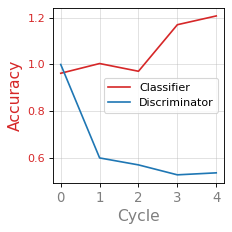

In [14]:
R.plot()